# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
lats = []
longs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []
w_cities = []

url = "http://api.openweathermap.org/data/2.5/weather?"
i = 0

for city in cities:
    try:
        i = i+1
        print(f"Processing Record {i} | {city}")
        query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        w_cities.append(weather_json["name"])
        temperature = weather_json["main"]["temp"]
        print(f"The temperature in {city} is {temperature} F.")
        lats.append(weather_json["coord"]["lat"])
        longs.append(weather_json["coord"]["lon"])
        max_temps.append(weather_json["main"]["temp_max"])
        humidities.append(weather_json["main"]["humidity"])
        cloudinesses.append(weather_json["clouds"]["all"])
        wind_speeds.append(weather_json["wind"]["speed"])
        countries.append(weather_json["sys"]["country"])
        dates.append(weather_json["dt"])
    except:
        print("City not found, skipping...")

Processing Record 1 | torbay
The temperature in torbay is 25 F.
Processing Record 2 | rikitea
The temperature in rikitea is 78.62 F.
Processing Record 3 | lagoa
The temperature in lagoa is 57.33 F.
Processing Record 4 | albany
The temperature in albany is 24.17 F.
Processing Record 5 | jamestown
The temperature in jamestown is 21.15 F.
Processing Record 6 | vaini
The temperature in vaini is 82.4 F.
Processing Record 7 | hobart
The temperature in hobart is 62.26 F.
Processing Record 8 | bethel
The temperature in bethel is 27.32 F.
Processing Record 9 | altamira
The temperature in altamira is 80.6 F.
Processing Record 10 | berdigestyakh
The temperature in berdigestyakh is -15.16 F.
Processing Record 11 | krasnyy chikoy
The temperature in krasnyy chikoy is 17.24 F.
Processing Record 12 | busselton
The temperature in busselton is 54.63 F.
Processing Record 13 | qaanaaq
The temperature in qaanaaq is 5.4 F.
Processing Record 14 | bundaberg
The temperature in bundaberg is 75.81 F.
Processing 

The temperature in broken hill is 82.4 F.
Processing Record 122 | marv dasht
City not found, skipping...
Processing Record 123 | sumbawa
City not found, skipping...
Processing Record 124 | nouadhibou
The temperature in nouadhibou is 68 F.
Processing Record 125 | kadykchan
City not found, skipping...
Processing Record 126 | salinas
The temperature in salinas is 57.29 F.
Processing Record 127 | kuche
City not found, skipping...
Processing Record 128 | de-kastri
The temperature in de-kastri is 13.28 F.
Processing Record 129 | new norfolk
The temperature in new norfolk is 59.22 F.
Processing Record 130 | souillac
The temperature in souillac is 78.8 F.
Processing Record 131 | saint-augustin
The temperature in saint-augustin is 12.79 F.
Processing Record 132 | ponta do sol
The temperature in ponta do sol is 57.54 F.
Processing Record 133 | sitka
The temperature in sitka is 24.8 F.
Processing Record 134 | elektrogorsk
The temperature in elektrogorsk is 5 F.
Processing Record 135 | hof
The tem

The temperature in los llanos de aridane is 59.27 F.
Processing Record 236 | pingliang
The temperature in pingliang is 37.99 F.
Processing Record 237 | souris
The temperature in souris is -11.49 F.
Processing Record 238 | belaya gora
The temperature in belaya gora is -19.48 F.
Processing Record 239 | outjo
The temperature in outjo is 67.98 F.
Processing Record 240 | whitehorse
The temperature in whitehorse is -15.99 F.
Processing Record 241 | udachnyy
The temperature in udachnyy is -24.56 F.
Processing Record 242 | adrar
The temperature in adrar is 67.37 F.
Processing Record 243 | barao de cocais
The temperature in barao de cocais is 72.23 F.
Processing Record 244 | esperance
The temperature in esperance is 60.8 F.
Processing Record 245 | georgetown
The temperature in georgetown is 79.36 F.
Processing Record 246 | klyuchi
The temperature in klyuchi is -22.74 F.
Processing Record 247 | zharkent
The temperature in zharkent is 30.61 F.
Processing Record 248 | port blair
The temperature in

City not found, skipping...
Processing Record 355 | palabuhanratu
City not found, skipping...
Processing Record 356 | guilin
The temperature in guilin is 51.8 F.
Processing Record 357 | kalemie
The temperature in kalemie is 71.22 F.
Processing Record 358 | loukhi
The temperature in loukhi is -0.36 F.
Processing Record 359 | kadhan
The temperature in kadhan is 60.13 F.
Processing Record 360 | dongsheng
The temperature in dongsheng is 32.5 F.
Processing Record 361 | boa vista
The temperature in boa vista is 87.8 F.
Processing Record 362 | mergui
City not found, skipping...
Processing Record 363 | libreville
The temperature in libreville is 84.2 F.
Processing Record 364 | kuching
The temperature in kuching is 75.11 F.
Processing Record 365 | terra santa
The temperature in terra santa is 77.92 F.
Processing Record 366 | mossendjo
The temperature in mossendjo is 71.56 F.
Processing Record 367 | opuwo
The temperature in opuwo is 69.44 F.
Processing Record 368 | samarai
The temperature in sam

The temperature in sosnovo-ozerskoye is 13.95 F.
Processing Record 475 | fort nelson
The temperature in fort nelson is -4 F.
Processing Record 476 | lazaro cardenas
The temperature in lazaro cardenas is 80.02 F.
Processing Record 477 | camabatela
The temperature in camabatela is 62.83 F.
Processing Record 478 | zhigalovo
The temperature in zhigalovo is -5.96 F.
Processing Record 479 | saint-joseph
The temperature in saint-joseph is 73.58 F.
Processing Record 480 | imbituba
The temperature in imbituba is 77 F.
Processing Record 481 | amboasary
The temperature in amboasary is 77 F.
Processing Record 482 | kirovskiy
The temperature in kirovskiy is 4.39 F.
Processing Record 483 | constitucion
The temperature in constitucion is 67.35 F.
Processing Record 484 | logon
The temperature in logon is 79.5 F.
Processing Record 485 | mango
The temperature in mango is 79.5 F.
Processing Record 486 | port macquarie
The temperature in port macquarie is 70 F.
Processing Record 487 | namibe
The temperatu

The temperature in hobyo is 76.64 F.
Processing Record 589 | alihe
The temperature in alihe is 3.69 F.
Processing Record 590 | sur
The temperature in sur is 69.3 F.
Processing Record 591 | dickinson
The temperature in dickinson is 72.32 F.
Processing Record 592 | kirakira
The temperature in kirakira is 84.43 F.
Processing Record 593 | umarkot
The temperature in umarkot is 56.86 F.
Processing Record 594 | vytegra
The temperature in vytegra is -4.05 F.
Processing Record 595 | sao filipe
The temperature in sao filipe is 72.01 F.
Processing Record 596 | aginskoye
The temperature in aginskoye is 12.13 F.
Processing Record 597 | brae
The temperature in brae is 36.37 F.
Processing Record 598 | meyungs
City not found, skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create dictionary of weather data for cities
weather_dict = {"City": w_cities, "Lat": lats, "Lng": longs, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": cloudinesses, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}
# Create dataframe of weather dictionary
weather_data = pd.DataFrame(weather_dict)
# Export dataframe to CSV
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=True)
# Show dataframe
weather_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,26.01,80,75,23.02,CA,1612996164
1,Rikitea,-23.1203,-134.9692,78.62,76,18,14.45,PF,1612996164
2,Lagoa,39.0500,-27.9833,57.33,69,68,35.43,PT,1612995896
3,Albany,42.6001,-73.9662,25.00,49,99,4.00,US,1612996073
4,Jamestown,42.0970,-79.2353,21.99,58,90,3.44,US,1612996135
...,...,...,...,...,...,...,...,...,...
548,Umarkot,25.3616,69.7362,56.86,33,30,1.48,PK,1612996402
549,Vytegra,61.0064,36.4481,-4.05,90,100,3.49,RU,1612996402
550,São Filipe,14.8961,-24.4956,72.01,76,50,11.14,CV,1612996402
551,Aginskoye,51.1000,114.5300,12.13,95,100,1.97,RU,1612996402


In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.673276,20.873373,49.303743,72.971067,53.262206,7.645841,1.612996e+09
std,33.193821,89.200880,32.778406,19.182549,38.301696,5.678588,1.059008e+02
min,-54.800000,-179.166700,-29.250000,11.000000,0.000000,0.540000,1.612996e+09
25%,-7.938600,-56.900000,23.400000,63.000000,17.000000,3.440000,1.612996e+09
50%,22.933300,25.678000,62.600000,78.000000,56.000000,5.990000,1.612996e+09
75%,48.849900,102.265500,76.620000,87.000000,90.000000,10.360000,1.612996e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,35.430000,1.612996e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.loc[weather_data["Humidity"] > 100, :]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [16]:
#  Get the indices of cities that have humidity over 100%.
#  No cities with Humidity > 100 found.


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = False)
clean_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,26.01,80,75,23.02,CA,1612996164
1,Rikitea,-23.1203,-134.9692,78.62,76,18,14.45,PF,1612996164
2,Lagoa,39.0500,-27.9833,57.33,69,68,35.43,PT,1612995896
3,Albany,42.6001,-73.9662,25.00,49,99,4.00,US,1612996073
4,Jamestown,42.0970,-79.2353,21.99,58,90,3.44,US,1612996135
...,...,...,...,...,...,...,...,...,...
548,Umarkot,25.3616,69.7362,56.86,33,30,1.48,PK,1612996402
549,Vytegra,61.0064,36.4481,-4.05,90,100,3.49,RU,1612996402
550,São Filipe,14.8961,-24.4956,72.01,76,50,11.14,CV,1612996402
551,Aginskoye,51.1000,114.5300,12.13,95,100,1.97,RU,1612996402


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

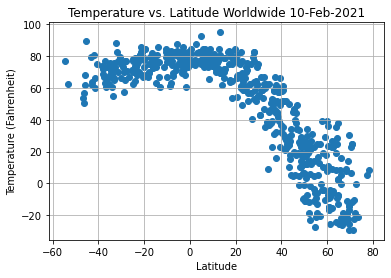

In [14]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Max Temp"], marker="o")
plt.title("Temperature vs. Latitude Worldwide 10-Feb-2021")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVStempWorld.png")

# Observations:
# Temperatures are moderate and climbing in the Southern Hemisphere, reaching a peak in the area 
# of the equator. In the Northern Hemisphere temperatures sink to moderate through the halfway point
# to the North Pole. Then temperatures begin to sink dramatically, reaching their minimum around 70
# degrees north.

## Latitude vs. Humidity Plot

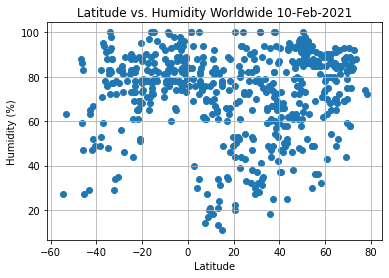

In [15]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Humidity"], marker="o")
plt.title("Latitude vs. Humidity Worldwide 10-Feb-2021")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVShumWorld.png")

# Observations:
# Humidity is randomly scattered throughout the latitudes. One bundle of outliers are shown at the
# area north of the equator, where temperatures were also highest. Here, humidities reach their minimum.

## Latitude vs. Cloudiness Plot

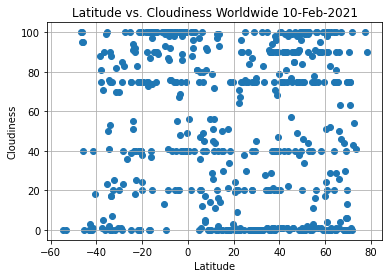

In [16]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness Worldwide 10-Feb-2021")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVScloudWorld.png")

# Observations:
# Cloudiness is also randomly scattered, with no differential across the latitudes. It is shown
# that cloudiness tends to be either very high or very low, with less representation in the middle
# percentage values across the globe.

## Latitude vs. Wind Speed Plot

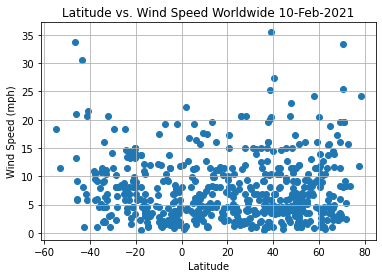

In [17]:
plt.scatter(clean_weather_data["Lat"], clean_weather_data["Wind Speed"], marker="o")
plt.title("Latitude vs. Wind Speed Worldwide 10-Feb-2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("LatVSwindWorld.png")

# Observations:
# It is generally the lower wind speeds at or under 10 mph that find the most representation.
# Outlying maximum winds can be found near the north and south poles and surrounding areas.

## Linear Regression

In [18]:
weather_NH = clean_weather_data.drop(clean_weather_data[clean_weather_data['Lat'] < 0].index, inplace = False)
weather_SH = clean_weather_data.drop(clean_weather_data[clean_weather_data['Lat'] > 0].index, inplace = False)
# weather_NH
weather_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.1203,-134.9692,78.62,76,18,14.45,PF,1612996164
5,Vaini,-21.2000,-175.2000,82.40,89,75,9.22,TO,1612996164
6,Hobart,-42.8794,147.3294,64.00,63,0,8.05,AU,1612996164
8,Altamira,-3.2033,-52.2064,80.60,83,75,3.44,BR,1612996165
11,Busselton,-33.6500,115.3333,55.00,98,17,6.31,AU,1612995853
...,...,...,...,...,...,...,...,...,...
527,Cap Malheureux,-19.9842,57.6142,78.01,77,24,8.99,MU,1612996267
529,São Francisco,-15.9486,-44.8644,72.73,82,37,3.87,BR,1612996400
534,Saquarema,-22.9200,-42.5103,77.00,88,40,5.75,BR,1612996401
535,Loandjili,-4.7561,11.8578,79.56,87,100,3.36,CG,1612996401


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7947857103302622


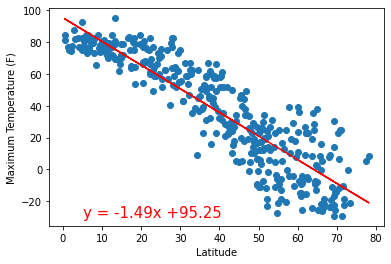

In [19]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Max Temp"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempNH-LR.png")
# Show plot
plt.show()

# Observations:
# Maximum temperature and latitude can be well represented with the below linear regression.
# There is a clear linearly descending relationship  between sinking max. temperatures and increasing
# latitude. This makes sense from the standpoint of sunlight, which is limited at the northern polar
# regions compared to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.18037485684556157


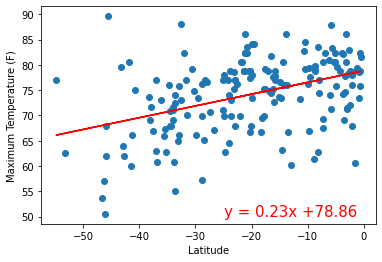

In [20]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Max Temp"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempSH-LR.png")
# Show plot
plt.show()

# Observations:
# There is also a clear linear relationship between rising temperatures and latitudes in the southern
# hemisphere. Though the slope of the regression is not as steep as for the Northern Hemisphere,
# it is clear that temperatures are at a minimum near the south pole and rise linearly through
# to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0681295989199293


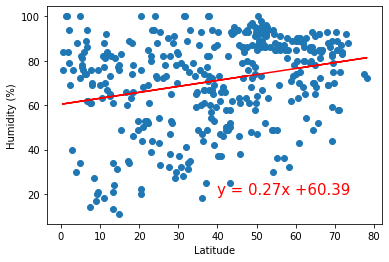

In [21]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Humidity"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVShumNH-LR.png")
# Show plot
plt.show()

# Observations:
# Humidity is less well represented with this linear regression. Humidity does tend to a moderate level
# and rise with the latitude of the Northern Hemisphere. This can be explained with the extensive
# covering of water bodies moving towards the North Pole.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18390496351712418


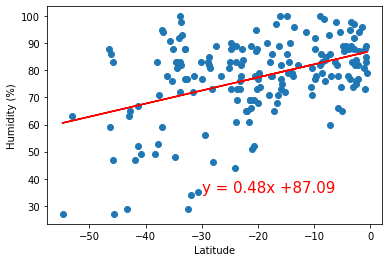

In [22]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Humidity"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVShumSH-LR.png")
# Show plot
plt.show()

# Observations:
# In the Southern Hemisphere, humidity also trends towards a moderate to high level, with lower
# levels and minimums found at lower latitudes. There is a slight linear relationship between
# rising latitudes and rising humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010604043739704952


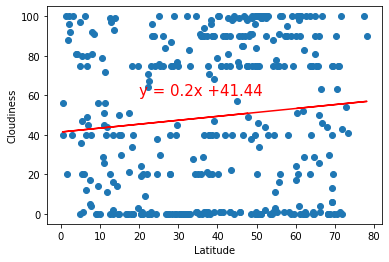

In [23]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVScloudNH-LR.png")
# Show plot
plt.show()

# Observations:
# There is not much of a slope to this linear regression, implying that cloudiness is not well
# represented with this metric. There are bundles of values in the high and low cloudiness areas,
# but these are not differentiated over the range of latitudes in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1536070659511932


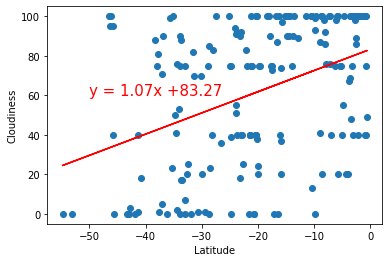

In [24]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVScloudSH-LR.png")
# Show plot
plt.show()

# Observations:
# In the Southern Hemisphere cloudiness is more diverse than in the Northern. While very low and
# very high cloudiness is also prevalent, there is a clear linear relationship between low latitudes
# and low cloudiness, increasing to higher cloudiness moving towards the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004890417388710366


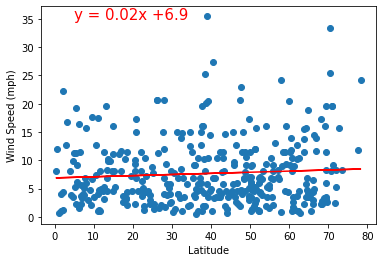

In [25]:
x_values = weather_NH["Lat"]
y_values = weather_NH["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempNH-LR.png")
# Show plot
plt.show()

# Observations:
# Wind speeds are generally low in the Northern Hemisphere, with some exceptions, especially in the
# area of the north pole. Otherwise there is no notable regression to be observed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13388960855455628


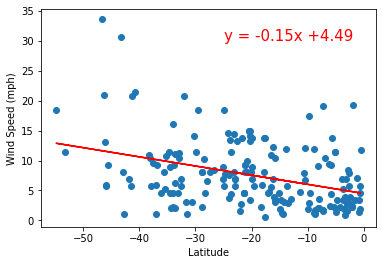

In [26]:
x_values = weather_SH["Lat"]
y_values = weather_SH["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("LatVStempSH-LR.png")
# Show plot
plt.show()

# Observations:
# Wind speeds in the Southern Hemisphere also center around the lower ranges. There is a slight
# decrease to be noted moving from the south pole towards the equator, likely due to the open oceans
# and decreased land masses in the lower latitudes.